In [ ]:
from google.colab import auth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import gspread
import pandas as pd
from google.auth import default
import numpy as np

In [ ]:
dataset1=pd.read_csv('/content/Mydata - Sheet1 (1).csv')

In [ ]:
auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)


In [ ]:
worksheet = gc.open('Mydata').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1=pd.DataFrame(data[1:], columns=data[0])
dataset1=dataset1.astype({'x':'float'})
dataset1=dataset1.astype({'y':'float'})
dataset1.head(20)

,x,y
0,1.0,5.0
1,2.0,7.0
2,3.0,9.0
3,4.0,11.0
4,5.0,13.0
5,6.0,15.0
6,7.0,17.0
7,8.0,19.0
8,9.0,21.0
9,10.0,23.0


In [ ]:
X=dataset1[['x']].values
y=dataset1[['y']].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=33)


In [ ]:

Scaler = MinMaxScaler()
Scaler.fit(X_train)


MinMaxScaler()

In [ ]:
X_train1=Scaler.transform(X_train)


In [ ]:
ai_brain=Sequential([
    Dense(8,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer = 'rmsprop', loss = 'mse')


In [ ]:
ai_brain.fit(X_train1, y_train, epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 651.3000
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 650.0569
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 649.1723
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 648.4443
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 647.8037
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 647.2272
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 646.6924
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 646.1859
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 645.6991
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 645.2164
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 644.7273
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 644.2073
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 643.6764
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 643.1582
Epoch 15/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42m

<Axes: >

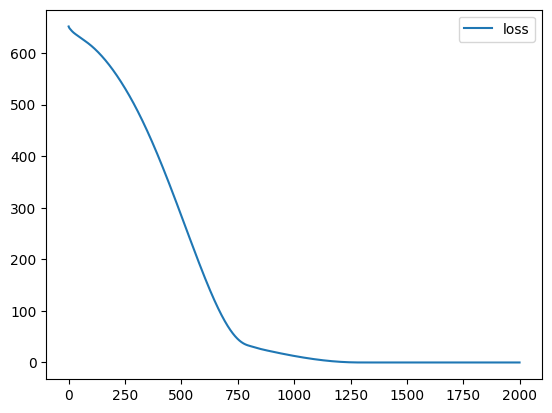

In [ ]:
#DEEPIKA S
loss_df= pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
#DEEPIKA S
X_test1=Scaler.transform(X_test)

In [ ]:
ai_brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.0018


0.0018494951073080301

In [ ]:
#DEEPIKA S
X_n1=[[19]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[41.05811]], dtype=float32)